<center><font size="18">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
# Version Check
from platform import python_version
python_version()

'3.7.6'

In [2]:
#Write code here
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [3]:
# Load the data
data= pd.read_csv("datasets/HR_comma_sep.csv")
df= data.copy()

In [4]:
# Find the shape
df.shape

(14999, 10)

In [5]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [7]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

Employees Left : 3571
Employees Not Left : 11428


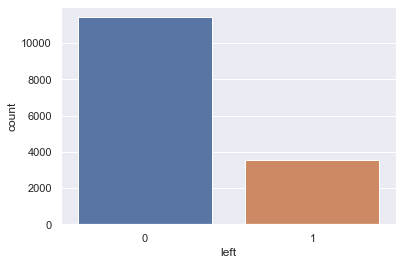

In [9]:
# Count of how many employees left the company

#plt.hist(df.left)
sns.countplot(df.left)
print("Employees Left : {}".format((df.left == 1).sum()))
print("Employees Not Left : {}".format((df.left == 0).sum()))


**Question:What can you interpret from the plot above?** 

Answer: Employees Left the company are 3571 and 11428 not left.

**Task 3: Find out the number of projects being handled.**

Number of Projects handled : 57042


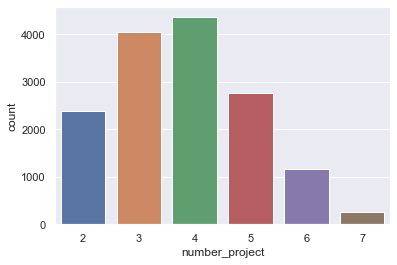

In [10]:
# Write code here
sns.countplot(df.number_project)
print("Number of Projects handled : {}".format(df.number_project.sum()))

**Question: What insights can you infer from the above plot?**

Answer: Most employees handled 3 to 4 projects. Only few handled 7 projects.

*Now we want to see how number of projects contribute to employee turn-over.<br> For this purpose, we can do a groupby as shown below. The final results show the of employees leaving the company against each number of projects .*

In [11]:
df_proj=df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj['perc']=df_proj['perc']*100

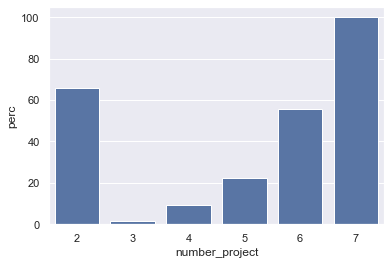

In [12]:
sns.barplot(x='number_project', y='perc', data=df_proj[df_proj['left']==1], color='b')

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: 
- The people who have handled 6,7 projects are left the company because they had spent too much time in the current company and they want to grow their skills or do some different kind of work.
- The people who have handled 2 projects left , either they got bored/ didnt like the work that much or they got better opportunity somewhere else.

## **Time spent at the company**

**Task 4: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the percetage to show that after how much time/years did most of employees exactly leave.*

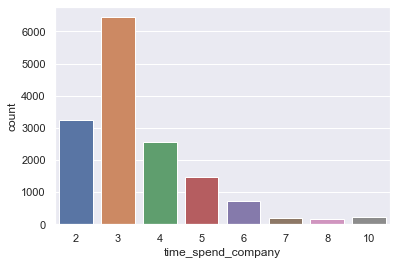

In [13]:
# Show the plot for the count of years here
sns.countplot(df.time_spend_company)

**Question: What is the maximum number of time spend by the employees?**

Answer: Maximum time spent : 10 Years

In [14]:
# Write the code here to get the percentage of employees leaving.
df_proj2=df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj2['perc']=df_proj2['perc']*100
df_proj2

,time_spend_company,left,perc
0,2,0,98.366215
1,2,1,1.633785
2,3,0,75.384138
3,3,1,24.615862
4,4,0,65.193586
5,4,1,34.806414
6,5,1,56.551256
7,5,0,43.448744
8,6,0,70.891365
9,6,1,29.108635


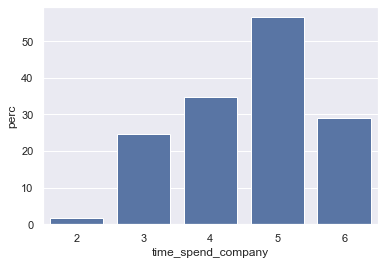

In [15]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.barplot(x='time_spend_company', y='perc', data=df_proj2[df_proj2['left']==1], color='b')

**Question: After what time period are employees most likely to leave the company ?**

Answer: After 5 years employees are most likely to leave the company

## **Employees engaged in any work accident**

**Task 5: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

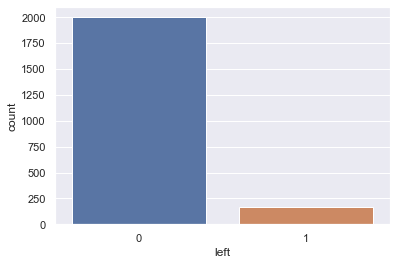

In [16]:
# Number of employees involved in work accident
sns.countplot(x='left',data=df[df['Work_accident']==1])

**Question: What can you conclude from the graph above?**

Answer: Only 169 out of 2169 has left the company, who were engaged in work accident.

In [17]:
# Number of employees involved in work accident and left or not left
print("Total Engaged in Work Accident : {}".format(df.Work_accident.sum()))
Selected_df=df[(df['Work_accident']==1) & (df['left']==1)]
print("'Left' Company (Engaged in Work Accident) : {}".format(Selected_df.left.sum()))
print("'Not Left' Company (Engaged in Work Accident) : {}".format(df.Work_accident.sum() - Selected_df.left.sum()))

Total Engaged in Work Accident : 2169
'Left' Company (Engaged in Work Accident) : 169
'Not Left' Company (Engaged in Work Accident) : 2000


## **Promotions in last 5 years**

**Task 6: How many number of employees got the promotion in last 5 year and how many of them left?**

Number of Employees got promotion : 319
Number of Employees got promotion and left : 19


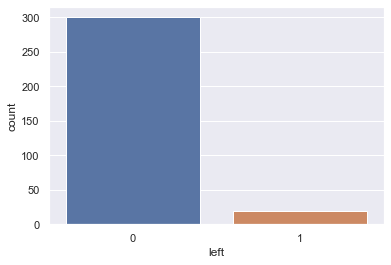

In [18]:
# Write code here
Promoted_df =df[df['promotion_last_5years']==1]

sns.countplot(x='left',data=Promoted_df)
print("Number of Employees got promotion : {}".format(Promoted_df.shape[0] ))
print("Number of Employees got promotion and left : {}".format(Promoted_df[Promoted_df.left ==1].shape[0]))

Answer: 19 Employees got promotion and left.

## **Salary trends**

**Task 7: What are the salary trends in the data? Use graphical representation for explanation**

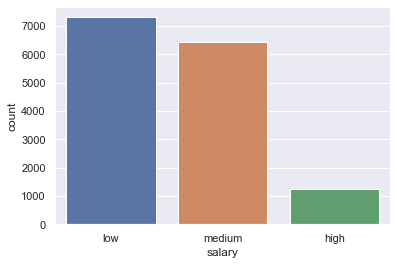

In [19]:
#Write code here
sns.countplot(x='salary', data=df)

Answer: Mostly have low then median salary. High salaried personals are quite low.

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [20]:
# Write code here
df_proj4=df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj4['perc']=df_proj4['perc']*100
df_proj4

,salary,left,perc
0,high,0,93.371059
1,high,1,6.628941
2,low,0,70.311646
3,low,1,29.688354
4,medium,0,79.568725
5,medium,1,20.431275


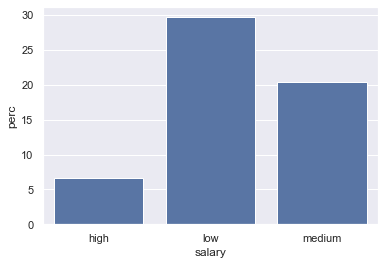

In [21]:
# Write code here for plot
sns.barplot(x='salary', y='perc', data=df_proj4[df_proj4['left']==1], color='b')

**Question: What does the above plot show?**

Answer:
    - 6.6% of High Salaried left the job
    - 29.6% of Low Salaried left the job
    - 20.4% of Medium Salaried left the job

## **Employees per Department**

**Task 8: Find out employees per department and also see which which department has highest number of employees leaving the company.**

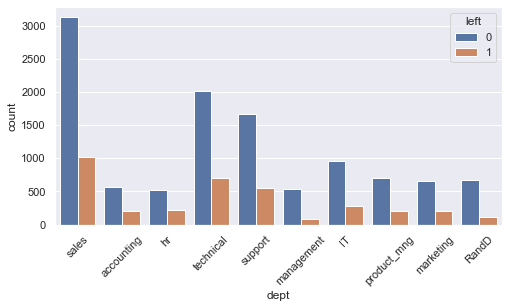

In [22]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
sns.countplot(x='dept',hue='left',data=df)

**Question: Which department has maximum number of employees?**

Answer: Sales Dept has maximum number of employees

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [23]:
# Write code here
df_proj5=df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj5['perc']=df_proj5['perc']*100
df_proj5

,dept,left,perc
0,IT,0,77.750611
1,IT,1,22.249389
2,RandD,0,84.625159
3,RandD,1,15.374841
4,accounting,0,73.402868
5,accounting,1,26.597132
6,hr,0,70.906631
7,hr,1,29.093369
8,management,0,85.555556
9,management,1,14.444444


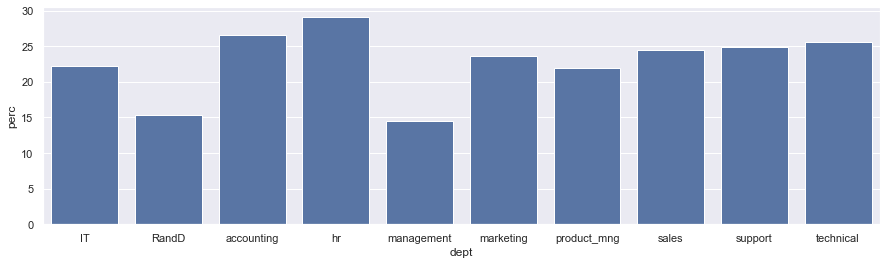

In [24]:
# Write code here to draw the plot
plt.figure(figsize=(15,4))
sns.barplot(x='dept', y='perc', data=df_proj5[df_proj5['left']==1], color='b')

Answer: HR Dept has the most percentage of turn-over

## **Satisfaction Level**

**Task 9: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

In [25]:
sat_left=df[df.left==1].loc[:,'satisfaction_level']
sat_not_left=df[df.left!=1].loc[:,'satisfaction_level']

Text(0, 0.5, 'Probability Density')

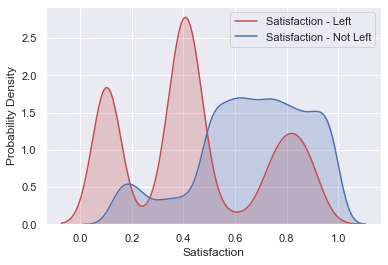

In [26]:
# Write the code here
sns.kdeplot(sat_left, color='r', shade=True, Label='Satisfaction - Left') 
  
sns.kdeplot(sat_not_left, color='b', shade=True, Label='Satisfaction - Not Left') 
  
plt.xlabel('Satisfaction') 
plt.ylabel('Probability Density')

**Question: What can you conclude from the plot above?**

Answer: 
- The people who are still in the company are mostly satisfied.
- The people who left are mostly un satisfied <0.5 satisfaction.
- Only few people who left were satisfied

This shows that people mostly left when unsatisfied.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 10: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [27]:
df['satisfaction_level_type'] = ''

In [28]:
# Write the code here to make bins as mentioned above
mylist = []
for x in (df['satisfaction_level']>=0.5):
    if x:
        mylist.append('High')
    else:
        mylist.append('Low')
df['satisfaction_level_type'] = mylist

**Task 11: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

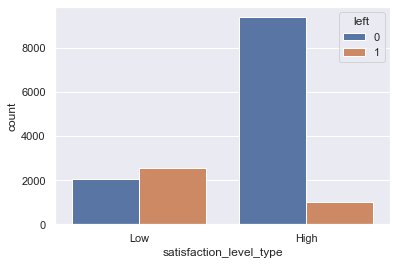

In [29]:
# Write Code Here
sns.countplot(x='satisfaction_level_type', hue='left', data=df)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking that satisfaction level type and number of projects in according to that specific type. 

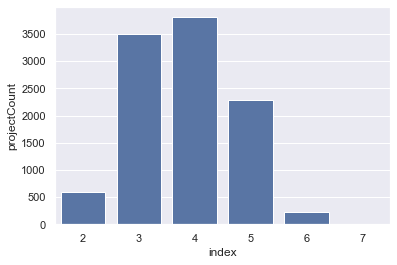

In [30]:
proj_count1= df.loc[df['satisfaction_level_type']=='High','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count1, color='b')

As you can see that higher satisfaction level is associated with the number of projects such that number of projects per employee are in the range of 3 to 5. 

Now lets check number of projects for low satisfaction level

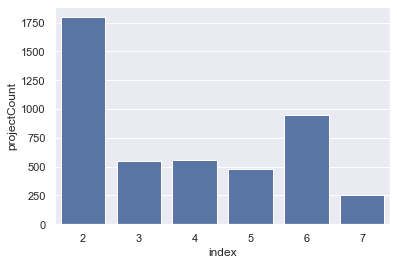

In [31]:
proj_count2= df.loc[df['satisfaction_level_type']=='Low','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count2, color='b')

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 12: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [32]:
df['employee_type']=''

In [33]:
# Write code here
mylist = []
for x in (df['number_project']):
    if x == 2:
        mylist.append('unburdened')
    elif x >= 3 and x<=5:
        mylist.append('Satisfactory')
    else:
        mylist.append('Burdened')
df['employee_type'] = mylist


**Task 13: Make a countplot to see which type of employee is leaving**

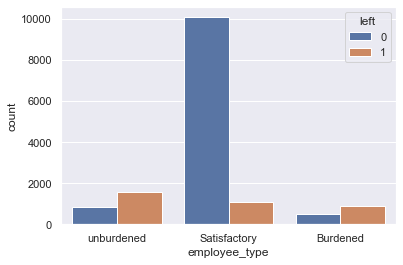

In [34]:
# Write code here
sns.countplot(x='employee_type', hue='left', data=df)

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 14: Do ONE HOT ENCODING of the above mentioned variables**

In [35]:
# Write code here
df_OneHot= pd.get_dummies(df, columns = ['dept', 'salary', 'satisfaction_level_type', 'employee_type'])
df=df_OneHot.copy()


In [36]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


**Task 15: Creating Independant and Dependant Variables**

In [37]:
# Write code here
X= df.drop(axis=1, columns= 'left')
Y= df.left

**Task 16: Perform Train Test Split with test size 30 percent and random state = 100**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Write code here
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.3, random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 25) (10499,)
(4500, 25) (4500,)


**Task 17: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [40]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Making instance and training the model
clf_rf = RandomForestClassifier(n_estimators=100,random_state=100)
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=100)

In [42]:
# Get predictions
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

**Precision**

In [43]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [44]:
#Write the code to calculate
rf_precion= precision_score(ytest,rf_pred)
print("Precision: {0:.3f}%".format(rf_precion*100))

Precision: 99.167%


**Accuracy**

In [45]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [46]:
# Write the code to calculate
rf_acc= accuracy_score(ytest,rf_pred)
print("Accuracy: {0:.3f}%".format(rf_acc*100))

Accuracy: 99.178%


**Recall**

In [47]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [48]:
# Write the code to calculate
rf_recall= recall_score(ytest,rf_pred)
print("Recall: {0:.3f}%".format(rf_recall*100))

Recall: 97.452%


**F1-Score**

In [49]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [50]:
# Write the code to calculate
rf_f1_score= f1_score(ytest,rf_pred)
print("F1 Score: {0:.3f}%".format(rf_f1_score*100))

F1 Score: 98.302%


**Classification Report**

In [51]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [52]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [53]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [54]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)
lr_model.fit(xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=100)

In [55]:
# get the predictions
lr_pred= lr_model.predict(xtest)

**Accuracy**

In [56]:
#Write the code here
lr_accuracy= accuracy_score(ytest,lr_pred)
print("Accuracy: {0:.3f}%".format(lr_accuracy*100))

Accuracy: 86.556%


**Precision**

In [57]:
#Write the code here
lr_precision= precision_score(ytest,lr_pred)
print("Precision: {0:.3f}%".format(lr_precision*100))

Precision: 74.700%


**Recall**

In [58]:
#Write the code here
lr_recall= recall_score(ytest,lr_pred)
print("Recall: {0:.3f}%".format(lr_recall*100))

Recall: 67.971%


**F1 Score**

In [59]:
#Write the code here
lr_f1_score= f1_score(ytest,lr_pred)
print("F1 Score: {0:.3f}%".format(lr_f1_score*100))

F1 Score: 71.177%


**Classification Report**

In [60]:
#Write the code here
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3401
           1       0.75      0.68      0.71      1099

    accuracy                           0.87      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.87      0.86      4500



## Ada Boost

In [61]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [62]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=100)

In [63]:
# Get the predictions
pred_clf_adb= clf_adb.predict(xtest)
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

**Accuracy**

In [64]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
print("Accuracy: {0:.3f}%".format(ab_accuracy*100))

Accuracy: 95.889%


**Precision**

In [65]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
print("Precision: {0:.3f}%".format(ab_precision*100))

Precision: 91.470%


**Recall**

In [66]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
print("Recall: {0:.3f}%".format(ab_recall*100))

Recall: 91.720%


**F1-Score**

In [67]:
#Write code here
ab_f1_score= f1_score(ytest,pred_clf_adb)
print("F1-Score: {0:.3f}%".format(ab_f1_score*100))

F1-Score: 91.595%


**Classification Report**

In [68]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3401
           1       0.91      0.92      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# Result Comparisons

**Task 18: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [69]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "Ada Boost"],
                   "Accuracy": [rf_acc, lr_accuracy, ab_accuracy],
                   "Precision": [rf_precion, lr_precision, ab_precision],
                   "Recall": [rf_recall, lr_recall, ab_recall],
                   "F1 Score": [rf_f1_score, lr_f1_score, ab_f1_score]
                   }

In [70]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.991778,0.991667,0.974522,0.983020
2,Ada Boost,0.958889,0.914701,0.917197,0.915947
1,Logistic Regression,0.865556,0.747000,0.679709,0.711768


**Task 19: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

## Checking Random Forest in depth

In [71]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [72]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [73]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

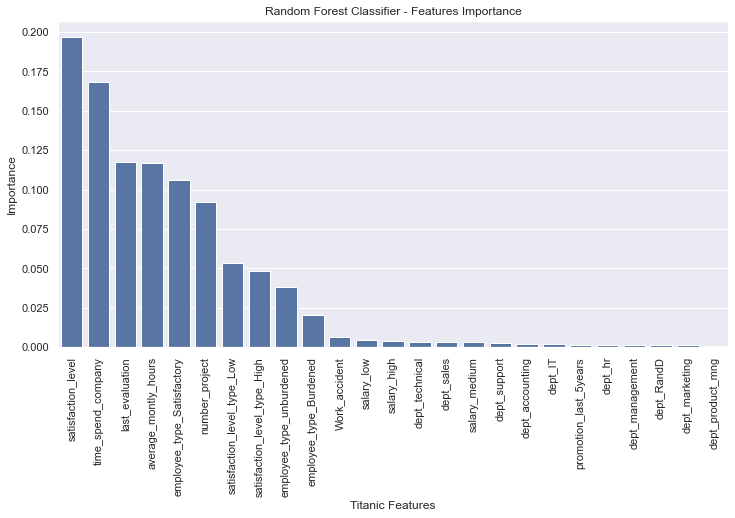

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid1 = {"n_estimators": [60, 80, 100, 110],
               "max_depth": [15, 20, 25],
               "min_samples_leaf": [1, 2]}


# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(clf_rf, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 80},
 0.9878082987363597)

### Random Forest Hyperparameters Tuning Using Randomized Search

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=70, stop=100, num=4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 25, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

In [79]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [80]:
rf_random = RandomizedSearchCV(
    estimator=clf_rf, param_distributions=random_grid1, n_iter=100, cv=5, verbose=0, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=100,
                   param_distributions={'max_depth': [15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25,
                                                      None],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [70, 80, 90, 100]},
                   random_state=100)

In [81]:
clf_rf_rand = rf_random.best_estimator_

In [82]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=22, n_estimators=70, random_state=100)

In [83]:
clf_rf_rand.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=22, n_estimators=70, random_state=100)

In [84]:
pred_rf_rand = clf_rf_rand.predict(xtest)
prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:, 1]

In [85]:
rf_random_recall= recall_score(ytest,pred_rf_rand)
rf_random_acc= accuracy_score(ytest,pred_rf_rand)
rf_random_pre= precision_score(ytest,pred_rf_rand)
rf_random_f1_score= f1_score(ytest,pred_rf_rand)

print("Random Forest Hyperparameters Tuning Using Randomized Search")
print("Precision: {0:.3f}%".format(rf_random_pre*100))
print("Accuracy:  {0:.3f}%".format(rf_random_acc*100))
print("Recall:    {0:.3f}%".format(rf_random_recall*100))
print("F1-Score:  {0:.3f}%".format(rf_random_f1_score*100))

Random Forest Hyperparameters Tuning Using Randomized Search
Precision: 99.444%
Accuracy:  99.289%
Recall:    97.634%
F1-Score:  98.531%


In [86]:
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.99      0.98      0.99      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Checking AdaBoost in depth

Text(0.5, 1.0, 'AdaBoost Classifier - Features Importance')

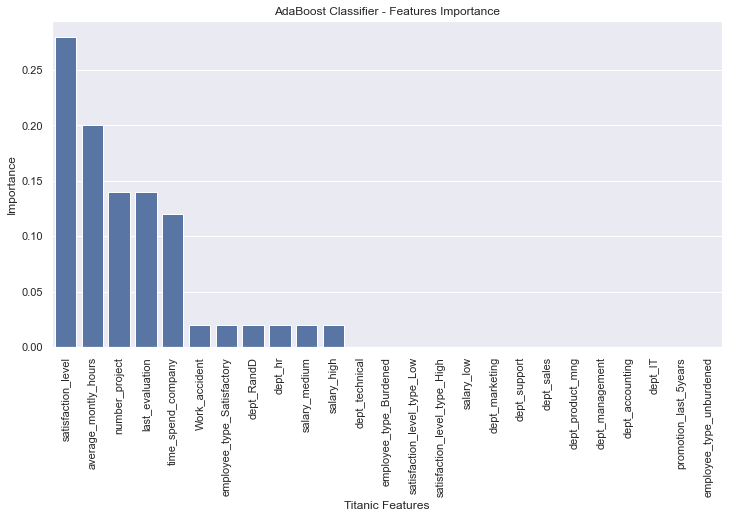

In [87]:
features_tuple = list(zip(X.columns, clf_adb.feature_importances_))

feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

feature_imp = feature_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("AdaBoost Classifier - Features Importance")

### Adaboost Hyperparameters Tuning Using Randomized Search

In [88]:
#Tried multiple times
n_estimators = [int(x) for x in np.linspace(start=96, stop=104, num=5)]
learning_rate= [0.9, 1, 1.1]
random_grid2 = {"n_estimators": n_estimators,
               "learning_rate": learning_rate}

In [89]:
adb_random = RandomizedSearchCV(
    estimator=clf_adb, param_distributions=random_grid2, n_iter=100, cv=5, verbose=0, random_state=100)
# Fit the random search model
adb_random.fit(xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=100),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.9, 1, 1.1],
                                        'n_estimators': [96, 98, 100, 102,
                                                         104]},
                   random_state=100)

In [90]:
clf_adb_rand = adb_random.best_estimator_

In [91]:
clf_adb_rand.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.9, n_estimators=102, random_state=100)

In [92]:
pred_clf_adb_rand = clf_adb_rand.predict(xtest)

In [93]:
adb_pred_prb_rand = clf_adb_rand.predict_proba(xtest)[:, 1]

In [94]:
adb_random_recall= recall_score(ytest,pred_clf_adb_rand)
adb_random_acc= accuracy_score(ytest,pred_clf_adb_rand)
adb_random_pre= precision_score(ytest,pred_clf_adb_rand)
adb_random_f1_score= f1_score(ytest,pred_clf_adb_rand)

print("AdaBoost Hyperparameters Tuning Using Randomized Search")
print("Precision: {0:.3f}%".format(adb_random_pre*100))
print("Accuracy:  {0:.3f}%".format(adb_random_acc*100))
print("Recall:    {0:.3f}%".format(adb_random_recall*100))
print("F1-Score:  {0:.3f}%".format(adb_random_f1_score*100))

AdaBoost Hyperparameters Tuning Using Randomized Search
Precision: 92.189%
Accuracy:  96.222%
Recall:    92.357%
F1-Score:  92.273%


## Checking Logistic Regression in depth

### Logistic Regression Hyperparameters Tuning Using Randomized Search

In [95]:
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
penalty = ['l1','l2','elasticnet','none']
dual =[True, False]

In [96]:
random_grid3 = {"solver": solver,
                "penalty": penalty,
               "dual": dual}

In [97]:
lr_model = LogisticRegression(random_state=100,max_iter=100)
lr_random = RandomizedSearchCV(
    estimator=lr_model, param_distributions=random_grid3, n_iter=100, cv=5, verbose=0, random_state=100,n_jobs=4)
# Fit the random search model
lr_random.fit(xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
                   n_iter=100, n_jobs=4,
                   param_distributions={'dual': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100)

In [98]:
clf_lr_rand =lr_random.best_estimator_

In [99]:
clf_lr_rand.fit(xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(random_state=100, solver='saga')

In [100]:
pred_clf_lr_rand = clf_lr_rand.predict(xtest)

lr_pred_prb_rand = clf_lr_rand.predict_proba(xtest)[:, 1]

In [101]:
lr_random_recall= recall_score(ytest,pred_clf_lr_rand)
lr_random_acc= accuracy_score(ytest,pred_clf_lr_rand)
lr_random_pre= precision_score(ytest,pred_clf_lr_rand)
lr_random_f1_score= f1_score(ytest,pred_clf_lr_rand)

print("Logistic Regression Hyperparameters Tuning Using Randomized Search")
print("Precision: {0:.3f}%".format(lr_random_pre*100))
print("Accuracy:  {0:.3f}%".format(lr_random_acc*100))
print("Recall:    {0:.3f}%".format(lr_random_recall*100))
print("F1-Score:  {0:.3f}%".format(lr_random_f1_score*100))

Logistic Regression Hyperparameters Tuning Using Randomized Search
Precision: 80.709%
Accuracy:  88.667%
Recall:    70.428%
F1-Score:  75.219%


In [102]:
# Write the code here
comparison_dict2 = {"Algorithm": ["Random Forest", "Logistic Regression", "Ada Boost"],
                    "Old Accuracy": [rf_acc, lr_accuracy, ab_accuracy],
                   "Accuracy": [rf_random_acc, lr_random_acc, adb_random_acc],
                    "Old Precision": [rf_precion, lr_precision, ab_precision],
                   "Precision": [rf_random_pre, lr_random_pre, adb_random_pre],                
                    "Old Recall": [rf_recall, lr_recall, ab_recall],
                   "Recall": [rf_random_recall, lr_random_recall, adb_random_recall],
                    "Old F1 Score": [rf_f1_score, lr_f1_score, ab_f1_score],
                   "F1 Score": [rf_random_f1_score, lr_random_f1_score, adb_random_f1_score]
                   }

comparison2 = pd.DataFrame(comparison_dict2)
comparison2.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Old Accuracy,Accuracy,Old Precision,Precision,Old Recall,Recall,Old F1 Score,F1 Score
0,Random Forest,0.991778,0.992889,0.991667,0.994439,0.974522,0.976342,0.983020,0.985308
2,Ada Boost,0.958889,0.962222,0.914701,0.921889,0.917197,0.923567,0.915947,0.922727
1,Logistic Regression,0.865556,0.886667,0.747000,0.807091,0.679709,0.704277,0.711768,0.752187


# After HyperTuning The RandomForest is Still the best algorithm